# Monte Carlo methods - Control Variate

In [1]:
import fineng_irfx as fe
import matplotlib.pyplot as plt
import numpy as np
import math
from barrier import *

In [2]:
plot_dir = r"plots/Barrier/"

In [3]:
BM = fe.L4_BoxMuller(1)

### Convergence Analysis

In [4]:
S0 = 100.0
r = 0.05
sigma = 0.15

T = 5.0
K = 100
Bup = 270
Bdown = 30.0

m = 100

# Knock out
DBKO_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, True, m, BM)
DBKO_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, True, m, BM)

# Knock in
DBKI_call = price_barrier(S0, sigma, r, T, K, Bup, Bdown, True, False, m, BM)
DBKI_put = price_barrier(S0, sigma, r, T, K, Bup, Bdown, False, False, m, BM)

In [5]:
# running analytics
path_list = [int(10**i) for i in np.linspace(2, 4, 300)]

In [6]:
# Knock out

# pricing by CV
ko_call_prices_cv, ko_call_errors_cv = [], []
ko_put_prices_cv, ko_put_errors_cv = [], []

# pricing by MC
ko_call_prices, ko_call_errors = [], []
ko_put_prices, ko_put_errors = [], []

for n in path_list:
    price_mc, error_mc = DBKO_call.price(n, True)
    ko_call_prices.append(price_mc)
    ko_call_errors.append(error_mc)

    price_mc, error_mc = DBKO_put.price(n, True)
    ko_put_prices.append(price_mc)
    ko_put_errors.append(error_mc)

    price_mc, error_mc = DBKO_call.price_CV(n, True)
    ko_call_prices_cv.append(price_mc)
    ko_call_errors_cv.append(error_mc)

    price_mc, error_mc = DBKO_put.price_CV(n, True)
    ko_put_prices_cv.append(price_mc)
    ko_put_errors_cv.append(error_mc)

In [7]:
# Knock in

# pricing by CV
ki_call_prices_cv, ki_call_errors_cv = [], []
ki_put_prices_cv, ki_put_errors_cv = [], []

# pricing by MC
ki_call_prices, ki_call_errors = [], []
ki_put_prices, ki_put_errors = [], []

for n in path_list:
    price_mc, error_mc = DBKI_call.price(n, True)
    ki_call_prices.append(price_mc)
    ki_call_errors.append(error_mc)

    price_mc, error_mc = DBKI_put.price(n, True)
    ki_put_prices.append(price_mc)
    ki_put_errors.append(error_mc)

    price_mc, error_mc = DBKI_call.price_CV(n, True)
    ki_call_prices_cv.append(price_mc)
    ki_call_errors_cv.append(error_mc)

    price_mc, error_mc = DBKI_put.price_CV(n, True)
    ki_put_prices_cv.append(price_mc)
    ki_put_errors_cv.append(error_mc)

In [8]:
n_log = np.log10(np.array(path_list))

# Knock Out
ko_call_errors_log = np.log10(np.array(ko_call_errors))
ko_put_errors_log = np.log10(np.array(ko_put_errors))

ko_call_errors_cv_log = np.log10(np.array(ko_call_errors_cv))
ko_put_errors_cv_log = np.log10(np.array(ko_put_errors_cv))

# Knock In
ki_call_errors_log = np.log10(np.array(ki_call_errors))
ki_put_errors_log = np.log10(np.array(ki_put_errors))

ki_call_errors_cv_log = np.log10(np.array(ki_call_errors_cv))
ki_put_errors_cv_log = np.log10(np.array(ki_put_errors_cv))

/var/folders/b2/mn_0s0lj56v_x8twck3mp66m0000gn/T/ipykernel_34337/1672907137.py:7: RuntimeWarning: divide by zero encountered in log10
  ko_call_errors_cv_log = np.log10(np.array(ko_call_errors_cv))
/var/folders/b2/mn_0s0lj56v_x8twck3mp66m0000gn/T/ipykernel_34337/1672907137.py:8: RuntimeWarning: divide by zero encountered in log10
  ko_put_errors_cv_log = np.log10(np.array(ko_put_errors_cv))
/var/folders/b2/mn_0s0lj56v_x8twck3mp66m0000gn/T/ipykernel_34337/1672907137.py:11: RuntimeWarning: divide by zero encountered in log10
  ki_call_errors_log = np.log10(np.array(ki_call_errors))
/var/folders/b2/mn_0s0lj56v_x8twck3mp66m0000gn/T/ipykernel_34337/1672907137.py:12: RuntimeWarning: divide by zero encountered in log10
  ki_put_errors_log = np.log10(np.array(ki_put_errors))


### Plotting

In [9]:
def plot_cv_analysis(x_axis, data1, data2, y_label, title, save_path=None):
    plt.figure()
    plt.title(title)
    plt.plot(x_axis[0], data1[0], label=data1[1], alpha=0.7, linewidth=1.0)
    plt.plot(x_axis[0], data2[0], label=data2[1], alpha=0.7, linewidth=1.0)
    plt.legend()
    plt.grid(color="grey", linewidth=0.3, linestyle="--", alpha=0.3)
    plt.xlabel(x_axis[1])
    plt.ylabel(y_label)
    if save_path:
        plt.savefig(save_path)
    plt.show()

Knock out call

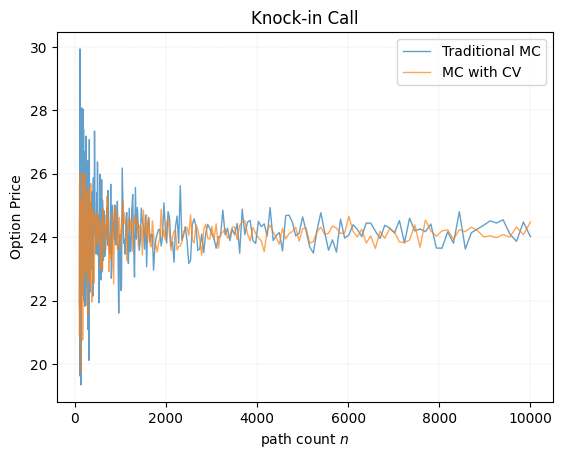

In [10]:
x_axis = [path_list, r"path count $n$"]
data1 = [ko_call_prices, "Traditional MC"]
data2 = [ko_call_prices_cv, "MC with CV"]
y_label = "Option Price"
title = "Knock-in Call"

save_path = plot_dir + "CV_KO_call_price_scaling.png"

plot_cv_analysis(x_axis, data1, data2, y_label, title, save_path)

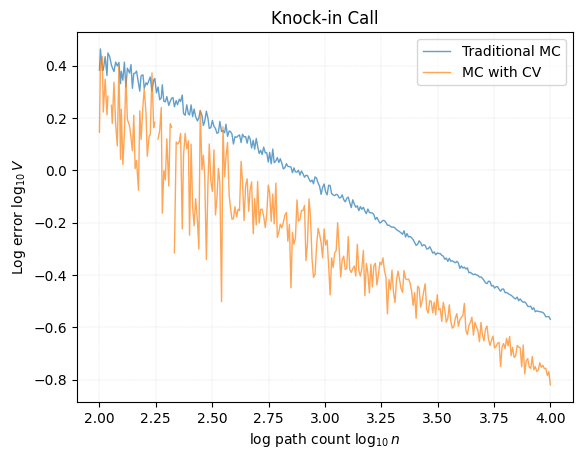

In [11]:
x_axis = [n_log, r"log path count $\log_{10} n$"]
data1 = [ko_call_errors_log, "Traditional MC"]
data2 = [ko_call_errors_cv_log, "MC with CV"]
y_label = "Log error $\log_{10} V$"
title = "Knock-in Call"

save_path = plot_dir + "CV_KO_call_error_scaling.png"

plot_cv_analysis(x_axis, data1, data2, y_label, title, save_path)

Knock out put

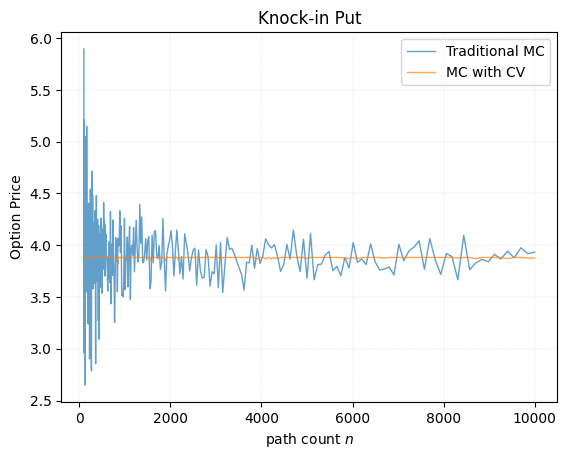

In [12]:
x_axis = [path_list, r"path count $n$"]
data1 = [ko_put_prices, "Traditional MC"]
data2 = [ko_put_prices_cv, "MC with CV"]
y_label = "Option Price"
title = "Knock-in Put"

save_path = plot_dir + "CV_KO_put_price_scaling.png"

plot_cv_analysis(x_axis, data1, data2, y_label, title, save_path)

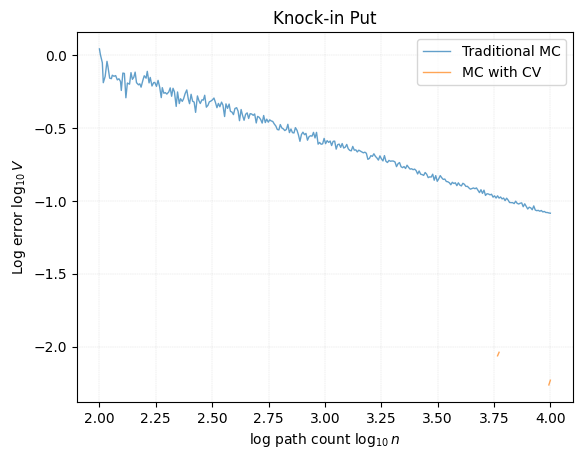

In [13]:
x_axis = [n_log, r"log path count $\log_{10} n$"]
data1 = [ko_put_errors_log, "Traditional MC"]
data2 = [ko_put_errors_cv_log, "MC with CV"]
y_label = "Log error $\log_{10} V$"
title = "Knock-in Put"

save_path = plot_dir + "CV_KO_put_error_scaling.png"

plot_cv_analysis(x_axis, data1, data2, y_label, title, save_path)